# The Dataset:

The dataset contains 32,561 entries with a total of 15 columns representing different attributes of the people. Here’s the list;

- Age: Discrete (from 17 to 90)
- Work class (Private, Federal-Government, etc): Nominal (9 categories)
- Final Weight (the number of people the census believes the entry represents): Discrete
- Education (the highest level of education obtained): Ordinal (16 categories)
- Education Number (the number of years of education): Discrete (from 1 to 16)
- Marital Status: Nominal (7 categories)
- Occupation (Transport-Moving, Craft-Repair, etc): Nominal (15 categories)
- Relationship in family (unmarried, not in the family, etc): Nominal (6 categories)
- Race: Nominal (5 categories)
- Sex: Nominal (2 categories)
- Capital Gain: Continous
- Capital Loss: Continous
- Hours (worked) per week: Discrete (from 1 to 99)
- Native Country: Nominal (42 countries)
- Income (whether or not an individual makes more than $50,000 annually): Boolean (≤$50k, >$50k)

Reference : https://www.kaggle.com/code/obrunet/adult-census-income/notebook

# 1 Load the data 

In [30]:
import sys
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\jayanti.prasad\Data\Misc\data\adult_census.csv")
print(df.shape, df.columns)


(32561, 15) Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


# 2 Data Summary 

In [31]:

cat_feat = df.select_dtypes(include=['object']).columns
print("\n 1) Categorical columns\n", cat_feat)   

num_feat = df.select_dtypes(include=['int64']).columns
print("\n 2) numerical features\n",num_feat)
    
    
# nb of female / male
nb_female = (df.sex == 'Female').astype('int').sum()
nb_male = (df.sex == 'Male').astype('int').sum()
 
    
# nb of people earning more or less than 50k per gender
nb_male_above = len(df[(df.income == '>50K') & (df.sex == 'Male')])
nb_male_below = len(df[(df.income == '<=50K') & (df.sex == 'Male')])
nb_female_above = len(df[(df.income == '>50K') & (df.sex == 'Female')])
nb_female_below = len(df[(df.income == '<=50K') & (df.sex == 'Female')])
  
print("3) Number of males above 50k",nb_male_above)
print("4) Number of males below 50k",nb_male_below)
print("5) Number of females above 50k",nb_female_above)
print("6) Number of females below 50k",nb_female_below)

cols = df.columns

print("\n 7) Missing Values\n")
for c in cols:
    print(c,"missing values",df[ df[c] == '?'].size )


 1) Categorical columns
 Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

 2) numerical features
 Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')
3) Number of males above 50k 6662
4) Number of males below 50k 15128
5) Number of females above 50k 1179
6) Number of females below 50k 9592

 7) Missing Values

age missing values 0
workclass missing values 27540
fnlwgt missing values 0
education missing values 0
education.num missing values 0
marital.status missing values 0
occupation missing values 27645
relationship missing values 0
race missing values 0
sex missing values 0
capital.gain missing values 0
capital.loss missing values 0
hours.per.week missing values 0
native.country missing values 8745
income missing values 0


# Plot Data

C:\Users\jayanti.prasad\Anaconda3\envs\aiml_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x1000 with 0 Axes>

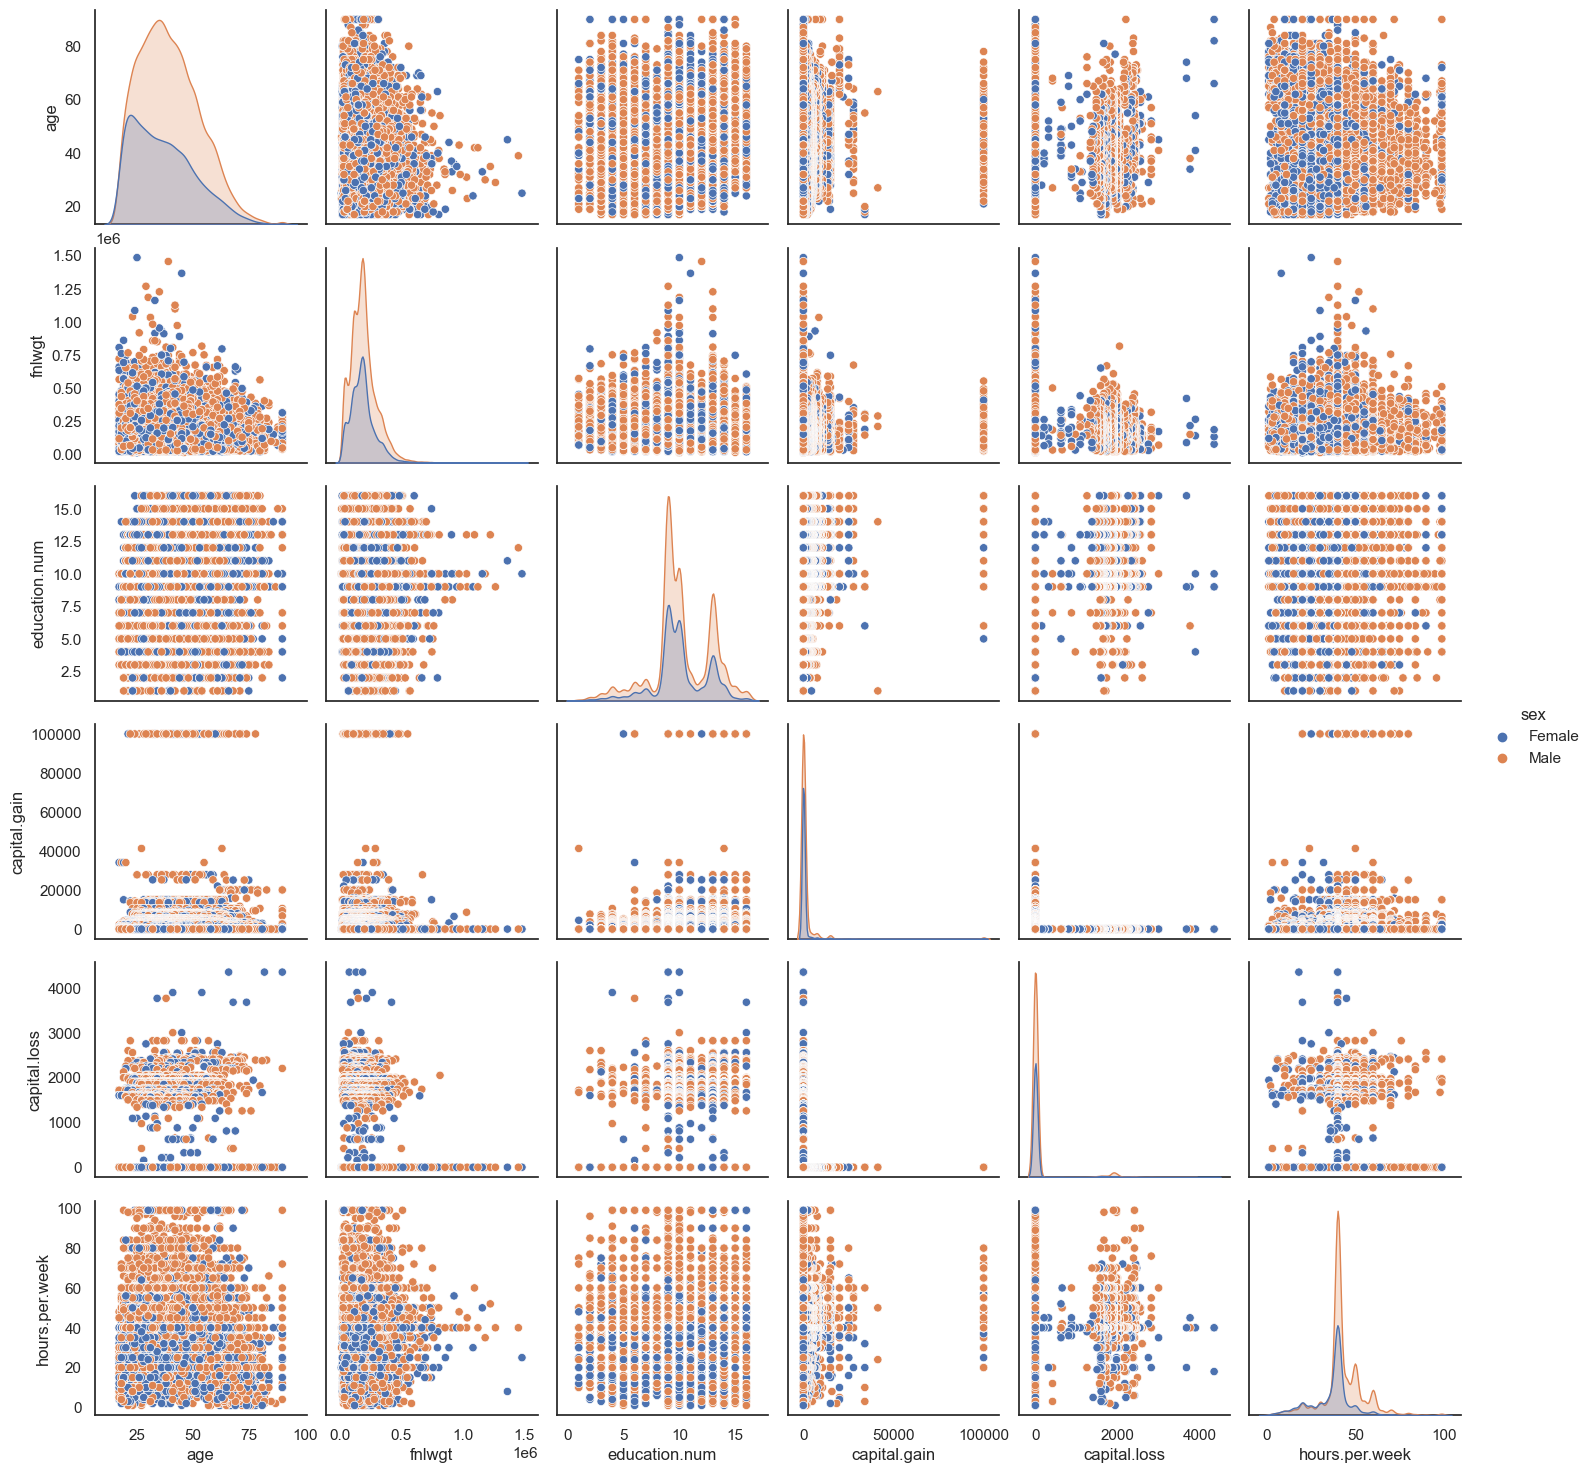

C:\Users\jayanti.prasad\AppData\Local\Temp\ipykernel_8392\1432064103.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['sex'] == 'Female'][c], shade=True, )
C:\Users\jayanti.prasad\AppData\Local\Temp\ipykernel_8392\1432064103.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['sex'] == 'Male'][c], shade=False)
C:\Users\jayanti.prasad\AppData\Local\Temp\ipykernel_8392\1432064103.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['sex'] == 'Female'][c], shade=True, )
C:\Users\jayanti.prasad\AppData\Local\Temp\ipykernel_8392\1432064103.py:16: FutureWarning: 

`shade` is now deprecated in favor of `

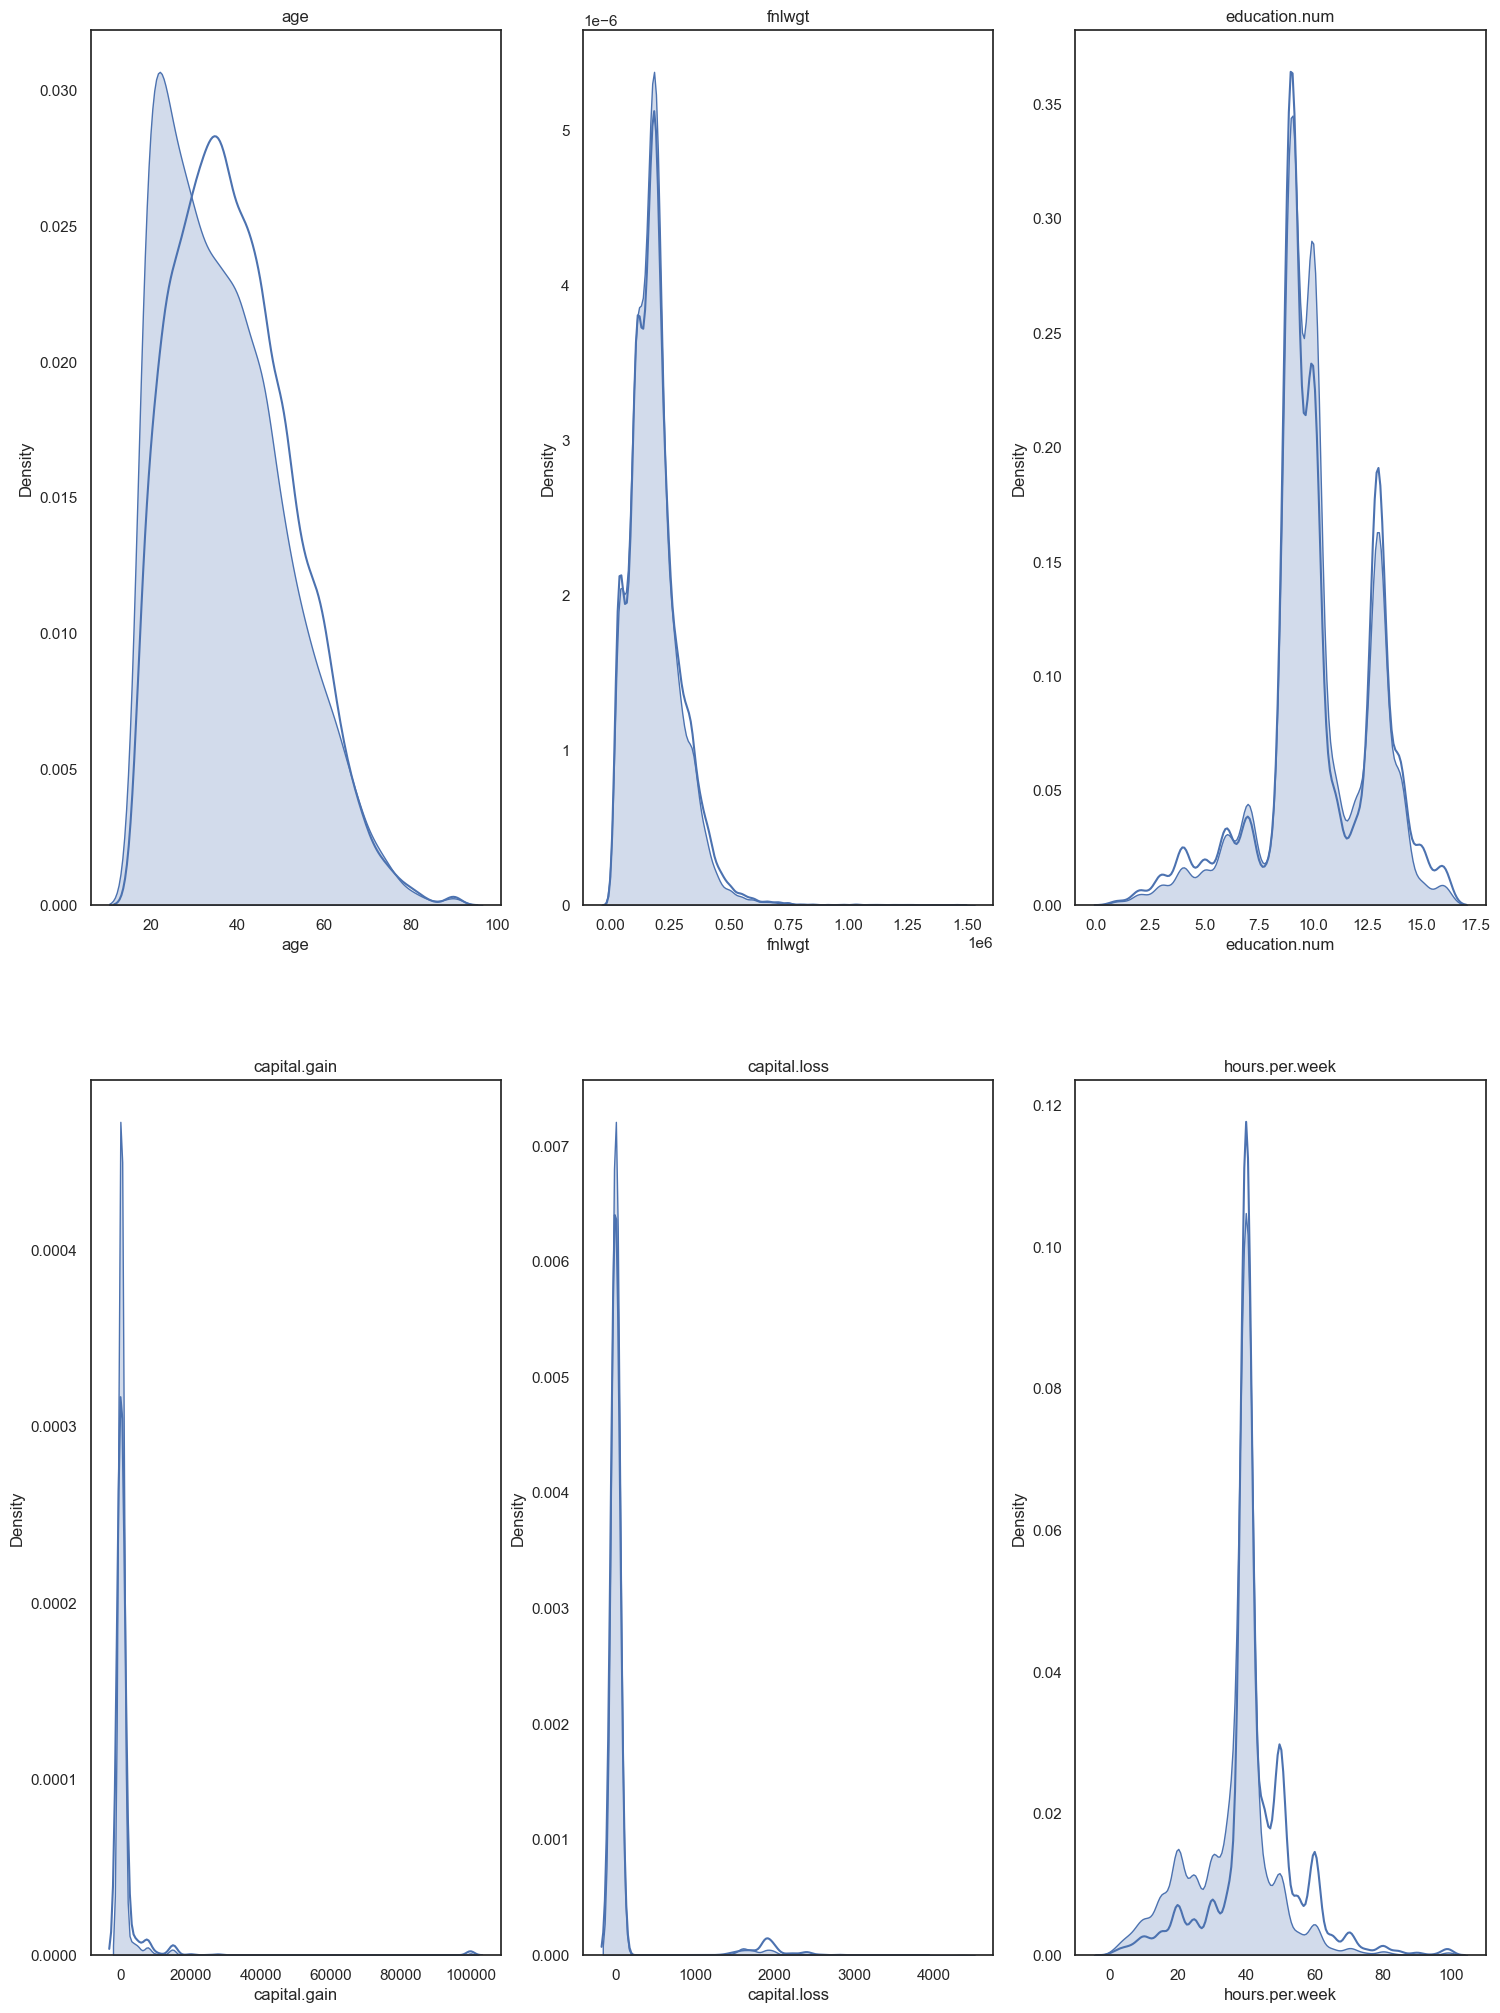

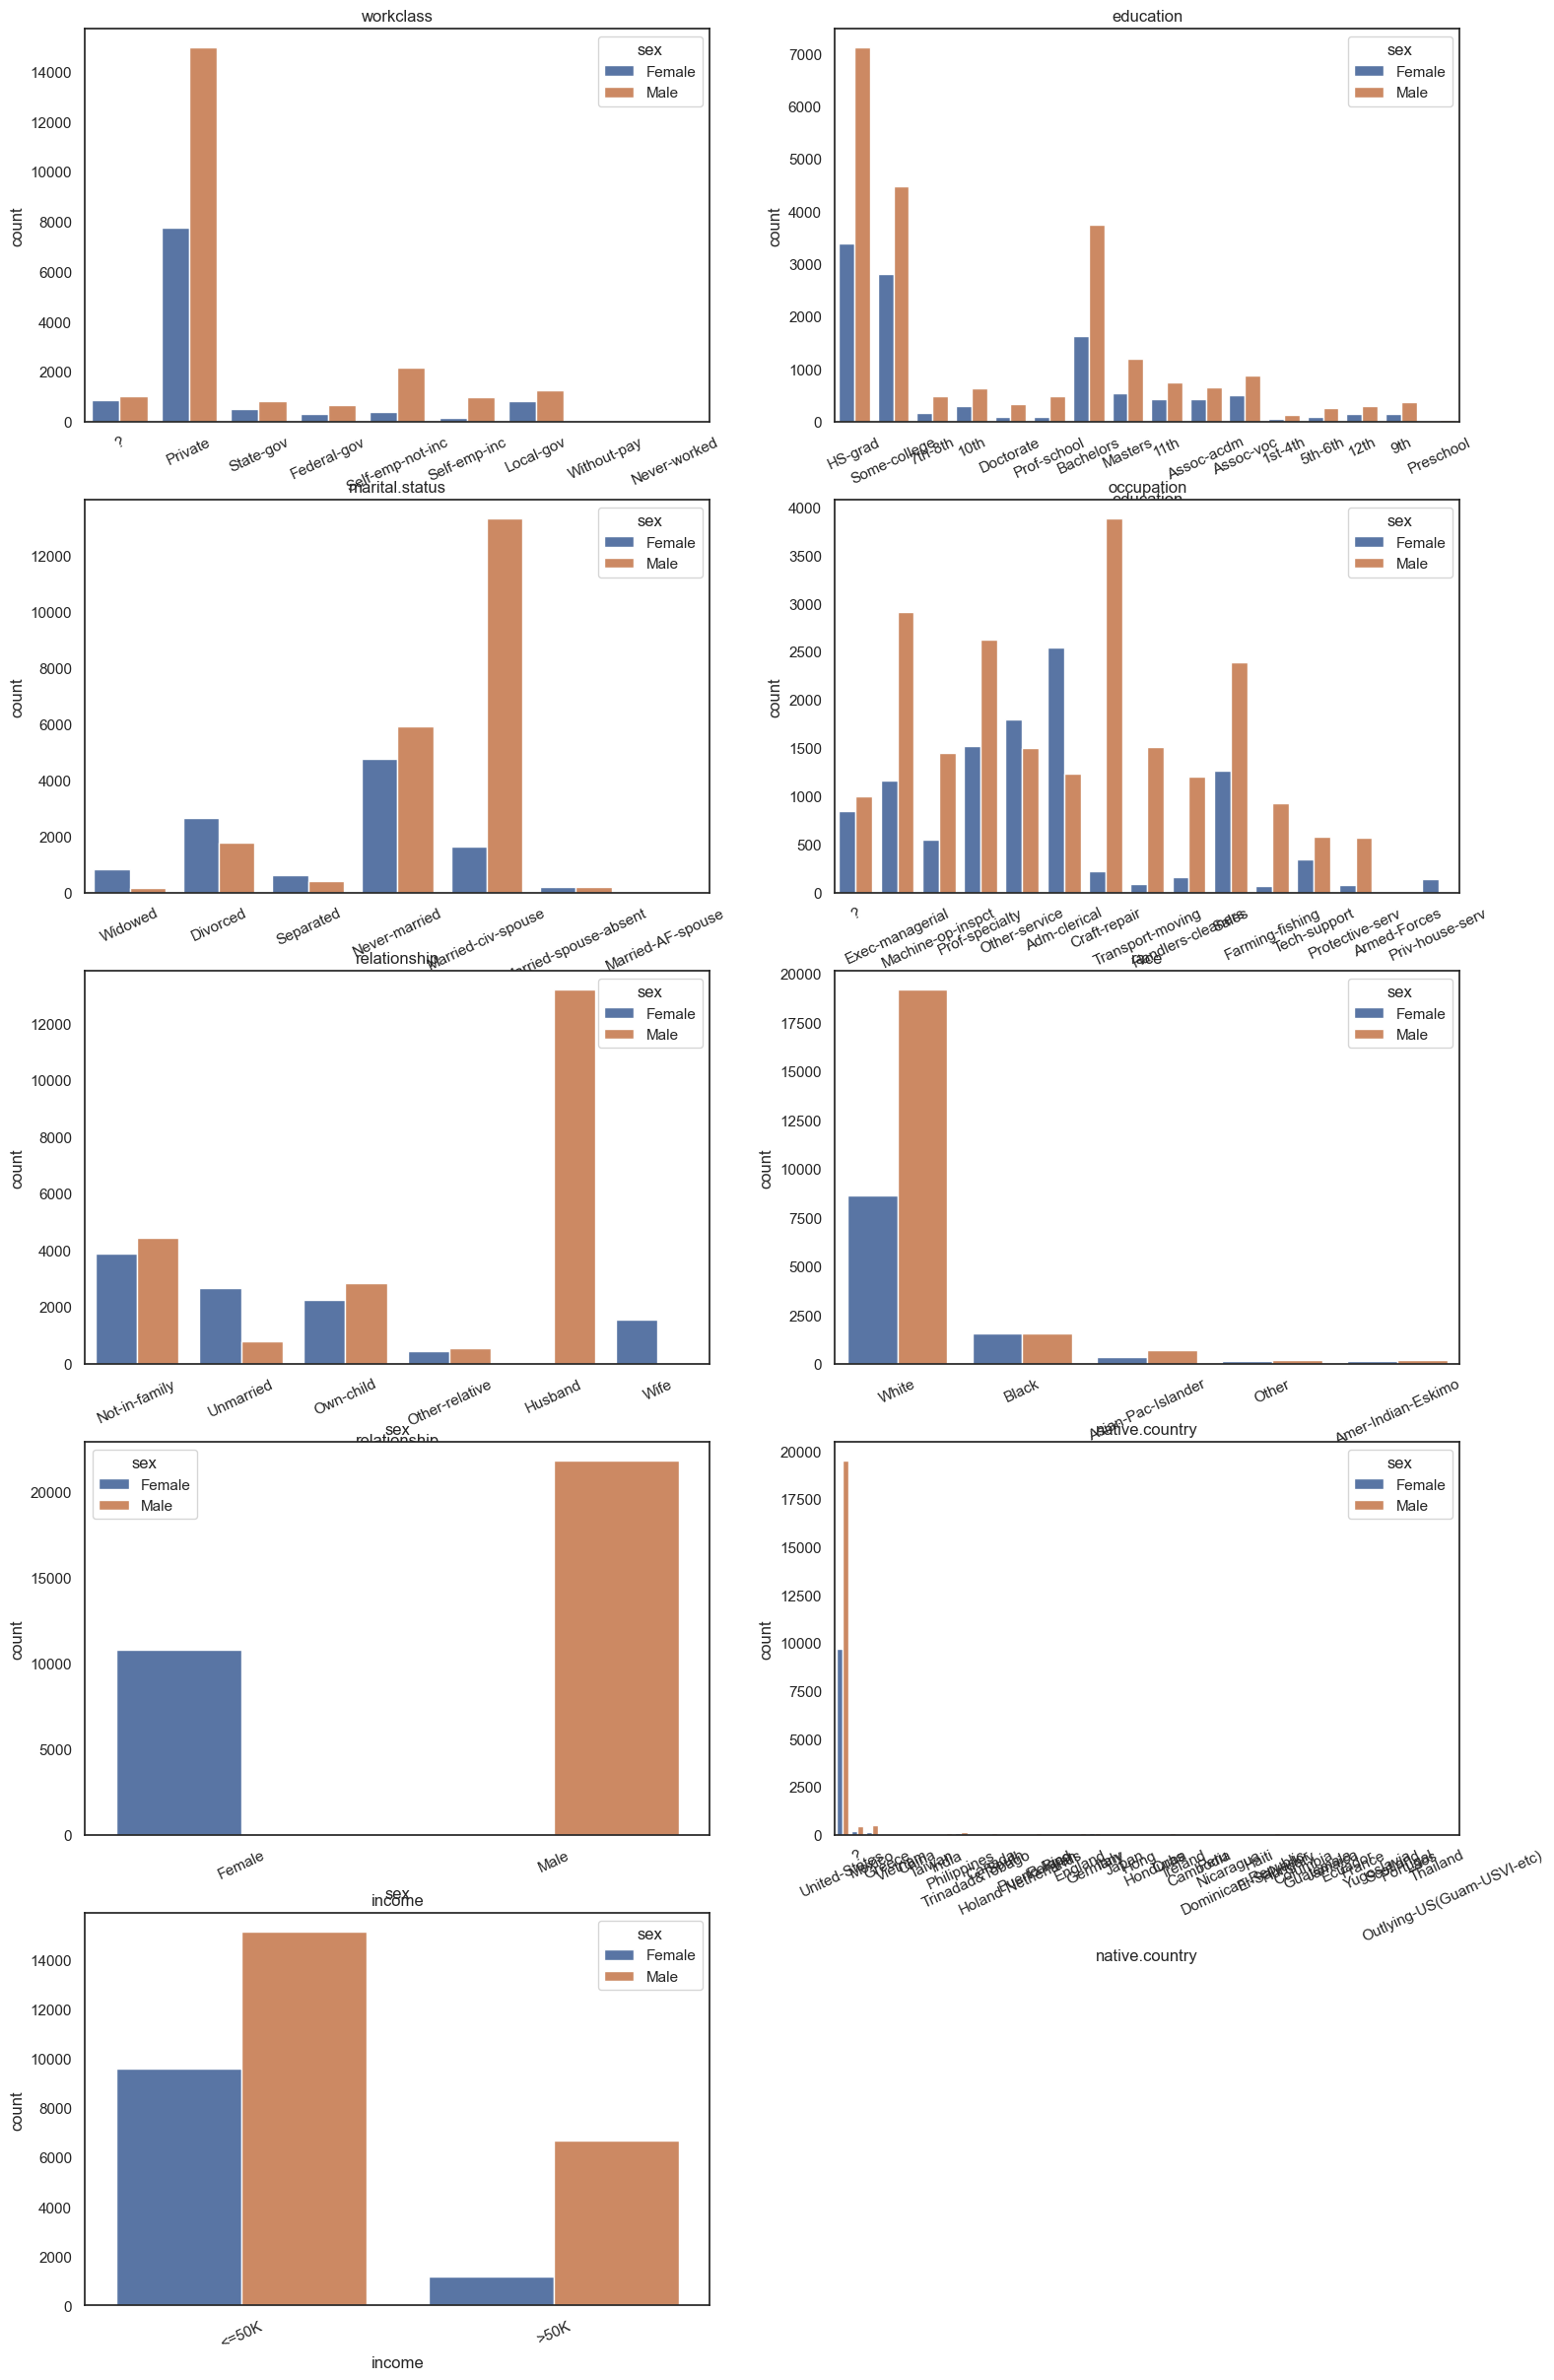

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
 
#df = df.drop_duplicates()
    
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='sex')
plt.show()
  
plt.figure(figsize=(18,25))
i=0
for c in num_feat:
    plt.subplot(2, 3, i+1)
    i += 1
    sns.kdeplot(df[df['sex'] == 'Female'][c], shade=True, )
    sns.kdeplot(df[df['sex'] == 'Male'][c], shade=False)
    plt.title(c)

plt.show()
    
plt.figure(figsize=(18,30))
plt.subplot(521)

i=0
for c in cat_feat:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=df, hue='sex')
    plt.title(c)
    plt.xticks(rotation = 25)

plt.show()
    

# Correlations

<Axes: >

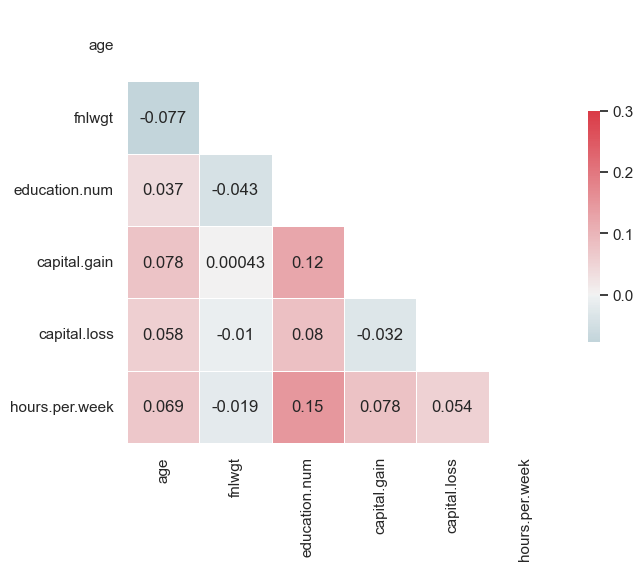

In [33]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[num_feat].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})


# Prepare the data 


In [49]:
   

def get_data (df):
  
    df['income'] = pd.get_dummies(df['income'], prefix='income', drop_first=True)
  
    y = df.income
    df = df.drop(columns=['income'])
    cols = list(df.columns)
    selected_feat = cols.copy()
    df_final = df[selected_feat]

    cat_feat = df_final.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df_final[cat_feat], drop_first=True)
    df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
    return  df_train, df_test, y_train, y_test


print("org dataframe:", df.columns)

df_train, df_test, y_train, y_test = get_data(df)

print("modf dataframe:", df_train.columns)

print(X_train.shape)
print("X[0]\n", df_train.iloc[1].values)


org dataframe: Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
modf dataframe: Index(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'ma

# Modeling the data 

MODEL: LogisticReg


C:\Users\jayanti.prasad\Anaconda3\envs\aiml_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       > 50K       0.86      0.93      0.89      4957
       < 50k       0.70      0.53      0.60      1556

    accuracy                           0.83      6513
   macro avg       0.78      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513

training accurcay 0.8329622235872236
test accurcay 0.8324888684170121
MODEL: DecisionTreeClf
              precision    recall  f1-score   support

       > 50K       0.86      0.90      0.88      4957
       < 50k       0.63      0.55      0.58      1556

    accuracy                           0.81      6513
   macro avg       0.74      0.72      0.73      6513
weighted avg       0.81      0.81      0.81      6513

training accurcay 0.8685887592137592
test accurcay 0.8136035621065562
MODEL: RandomForrest
              precision    recall  f1-score   support

       > 50K       0.86      0.90      0.88      4957
       < 50k       0.64      0.55      0.59      1556

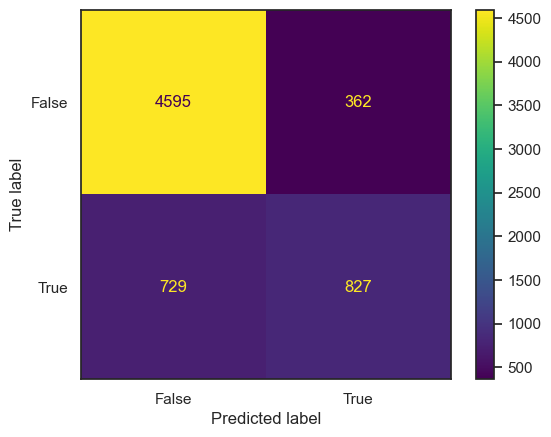

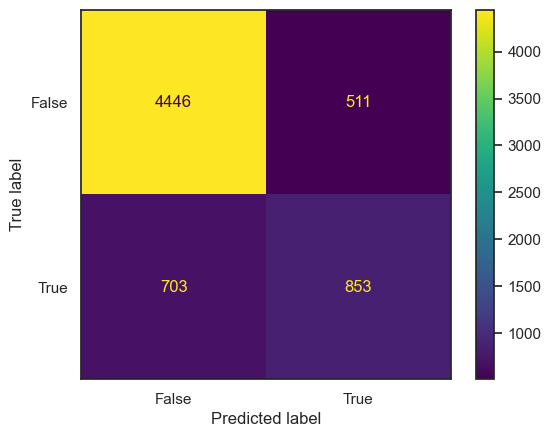

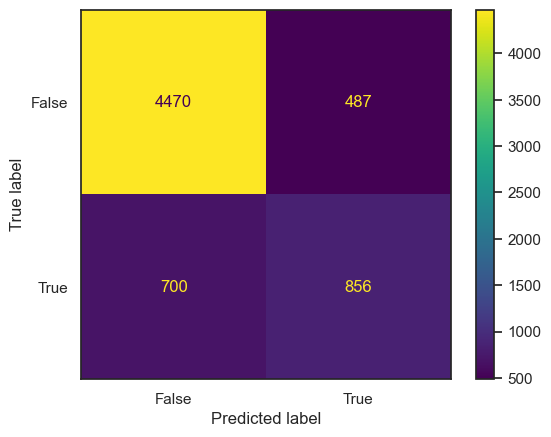

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def print_score(model, name,X_train,y_train,X_test,y_test):
    print("MODEL:",name)
    model.fit(X_train, y_train)
    y_pred = model.predict (X_test)
    
    print(classification_report(y_test, y_pred, target_names=["> 50K","< 50k"]))
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()
    
    
    acc_train = model.score(X_train, y_train)
    acc_test  = model.score(X_test, y_test)
    
    print("training accurcay",acc_train)
    print("test accurcay",acc_test)


print_score(LogisticRegression(), 'LogisticReg', df_train,  y_train, df_test, y_test)
print_score(DecisionTreeClassifier(), 'DecisionTreeClf',df_train,  y_train, df_test, y_test)
print_score(RandomForestClassifier(), 'RandomForrest',df_train,  y_train, df_test, y_test)

# Random Forrest 



{'max_depth': 8, 'max_features': 5, 'n_estimators': 250}
['marital.status_Married-civ-spouse', 'marital.status_Never-married', 'occupation_Exec-managerial', 'education_Bachelors', 'sex_Male', 'occupation_Prof-specialty', 'relationship_Own-child', 'relationship_Not-in-family', 'education_Masters', 'education_HS-grad', 'education_Prof-school', 'relationship_Unmarried', 'workclass_Private', 'workclass_Self-emp-inc', 'occupation_Other-service', 'native.country_United-States']


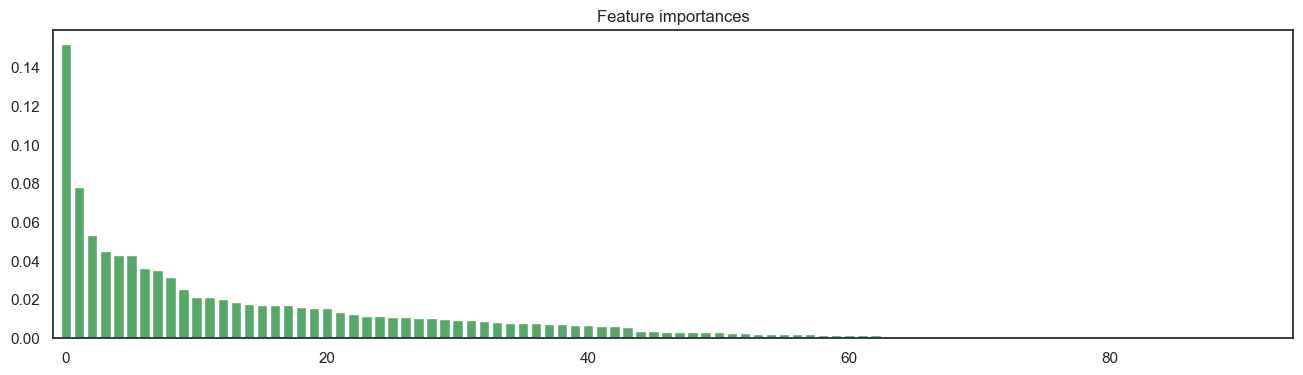

marital.status_Married-civ-spouse - 0.152
marital.status_Never-married - 0.078
occupation_Exec-managerial - 0.053
education_Bachelors - 0.045
sex_Male - 0.043
occupation_Prof-specialty - 0.043
relationship_Own-child - 0.036
relationship_Not-in-family - 0.035
education_Masters - 0.031
education_HS-grad - 0.025
education_Prof-school - 0.021
relationship_Unmarried - 0.021
workclass_Private - 0.020
workclass_Self-emp-inc - 0.018
occupation_Other-service - 0.017
native.country_United-States - 0.017
education_Doctorate - 0.017
education_Some-college - 0.017
relationship_Wife - 0.016
workclass_Self-emp-not-inc - 0.016
race_White - 0.016
occupation_Sales - 0.014
workclass_Local-gov - 0.012
workclass_Federal-gov - 0.011
race_Black - 0.011
occupation_Craft-repair - 0.011
workclass_State-gov - 0.011
occupation_Adm-clerical - 0.010
occupation_Tech-support - 0.010
education_Assoc-voc - 0.010
education_7th-8th - 0.009
education_Assoc-acdm - 0.009
education_11th - 0.009
occupation_Machine-op-inspct -

<Axes: >

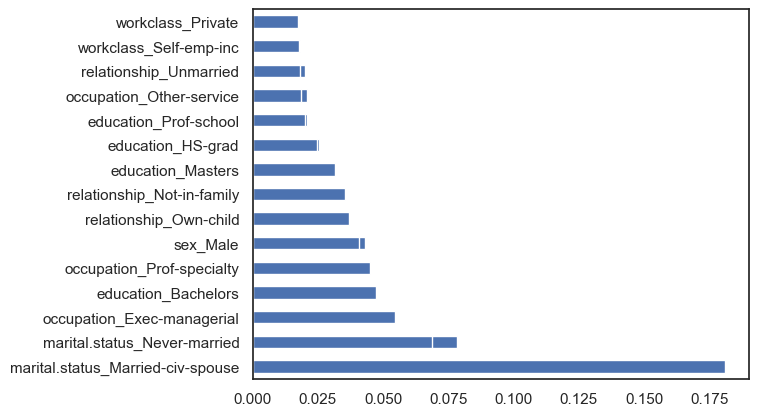

In [38]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier().fit(X_train, y_train)
rfc = RandomForestClassifier()

param_grid = { 
    'n_estimators': [50, 100, 150, 200, 250],
    'max_features': [1, 2, 3, 4, 5],
    'max_depth' : [4, 6, 8]
}

rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              #min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             n_jobs=None,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

print(rfc_cv.best_params_)

rfc_best = RandomForestClassifier(max_depth=8, max_features=5, n_estimators=250).fit(X_train, y_train)

np.argsort(rf.feature_importances_)[-16:]
print([list(X.columns)[i] for i in np.argsort(rf.feature_importances_)[-16:]][::-1])

# Feature importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Plot the feature importances of the tree
plt.figure(figsize=(16, 4))
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
#plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

    
(pd.Series(rf.feature_importances_, index=X_train.columns)
   .nlargest(15)
   .plot(kind='barh'))

extree = ExtraTreesClassifier().fit(X_train, y_train)
(pd.Series(extree.feature_importances_, index=X_train.columns)
   .nlargest(15)
   .plot(kind='barh'))